In [ ]:
from grade_classif.imports import *
from grade_classif.params.parser import hparams

In [ ]:
def get_filt(hparams):
    df = pd.read_csv(hparams.patch_classes, index_col='patchId')
    if hparams.filt == 'all':
        def filt(x):
            return df.loc[x.stem, 'type'] != 'garb'
    elif hparams.filt == 'K_all':
        def filt(x):
            return df.loc[x.stem, 'type'] != 'out' and df.loc[x.stem, 'type'] != 'garb'
    else:
        def filt(x):
            return df.loc[x.stem, 'type'] == hparams.filt
    return filt

In [ ]:
hparams.filt = 'K'

In [ ]:
filt = get_filt(hparams)

In [ ]:
n = {'1': [], '3': []}
scans = {'1': [], '3': []}
for grade in ['1', '3']:
    for scan in (hparams.data/grade).iterdir():
        i = 0
        scans[grade].append(scan)
        for fn in scan.iterdir():
            if filt(fn):
                i += 1
        n[grade].append(i)
    n[grade] = np.array(n[grade])
    scans[grade] = np.array(scans[grade])
    idxs = n[grade].argsort()
    n[grade] = n[grade][idxs]
    scans[grade] = scans[grade][idxs]

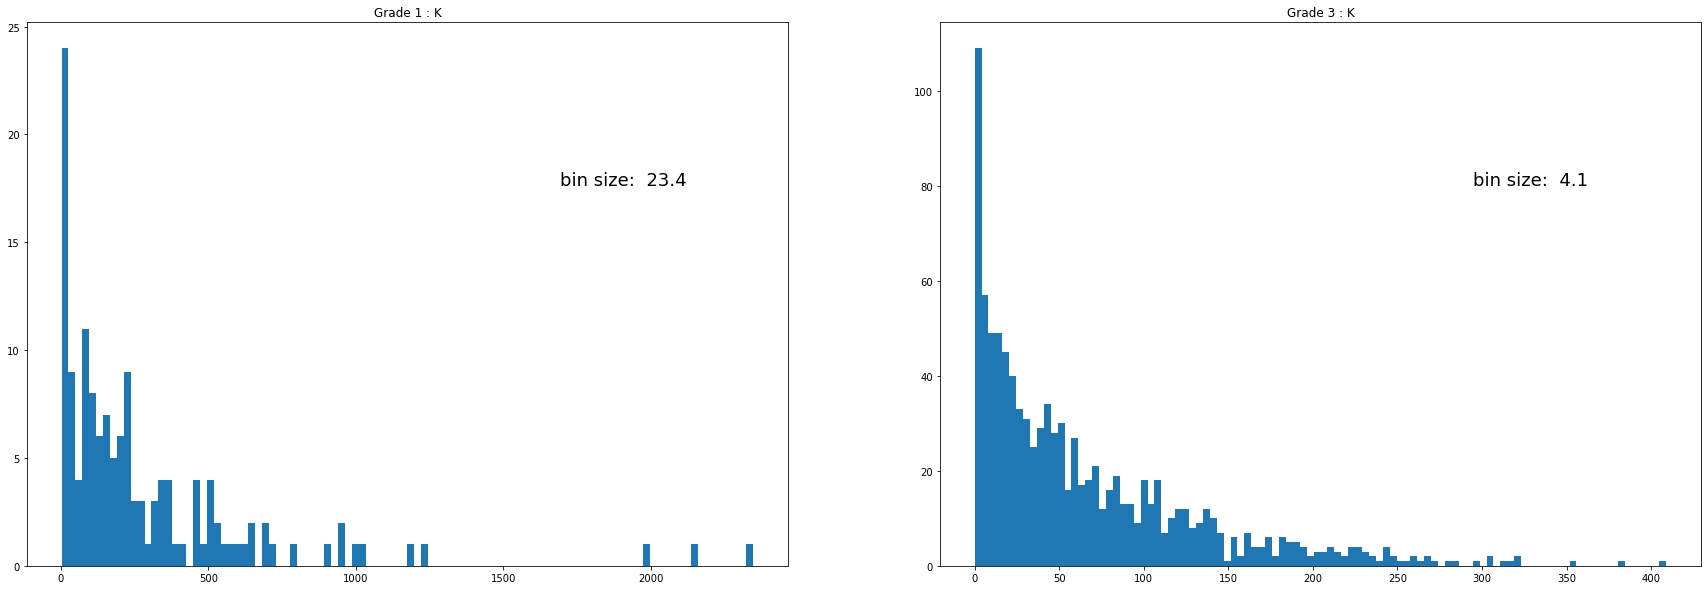

In [ ]:
hist = {}
bins = {}
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
for ax, grade in zip(axs.flatten(), ['1', '3']):
    hist[grade], bins[grade], _ = ax.hist(n[grade], bins=100)
    ax.set_title(f'Grade {grade} : {hparams.filt}')
    ax.text(0.7, 0.7, f'bin size: {bins[grade][1]-bins[grade][0]: .1f}', fontsize=18, transform=ax.transAxes)

In [ ]:
for grade in ['1', '3']:
    print(f'{grade} =====================')
    print('\n'.join(map(lambda x: str(x.stem), scans[grade][n[grade] < 10])))

1 =====================
CF_PACS04rescan_06P1056
CF_PACS04rescan_06P0952
CF_PACS04rescan_07P0219
CF_PACS04rescan_06P320
CF_PACS04rescan_06P1354
CF_PACS04rescan_06P029
CF_PACS04rescan_06P1225
CF_PACS04rescan_07P0220
CF_PACS04rescan_06P0519
CF_PACS04rescan_06P0959
CF_PACS04rescan_06P0948
CF_PACS04rescan_06P0825
3 =====================
CF_PACS04rescan_06P1028
CF_PACS04rescan_06P0619
CF_PACS04rescan_06P0830
CF_PACS05HE_04018-126354
CF_PACS04rescan_10F0174
CF_PACS04rescan_06P1158
CF_PACS04rescan_06P1080
CF_PACS04rescan_06P0914
CF_PACS04rescan_06P1187
CF_PACS04rescan_06P1135
CF_PACS04rescan_06P1115
CF_PACS04rescan_06P1375
CF_PACS04rescan_06P1292
CF_PACS04rescan_06P1132
CF_PACS04rescan_06P0906
CF_PACS04rescan_06P1131
CF_PACS04rescan_07P0016
CF_PACS04rescan_06P109
CF_PACS04rescan_06P0661
CF_PACS04rescan_10F0142
CF_PACS04rescan_06P0946
CF_PACS04rescan_07P0037
CF_PACS04rescan_07P0197
CF_PACS04rescan_07P0190
CF_PACS04rescan_06P1345
CF_PACS05HE_02011-12.9168.00
CF_PACS04rescan_06P210
CF_PACS04resca